In [1]:
%reload_ext autoreload
%autoreload 2

import sys
import os

import numpy as np
import bloscpack as bp
%matplotlib inline

sys.path.append(os.path.join(os.environ['REPO_DIR'], 'utilities'))
from utilities2015 import *
from metadata import *
from data_manager import *
from preprocess_utilities import *
from registration_utilities import *

/usr/local/lib/python2.7/dist-packages/matplotlib/__init__.py:1357: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


Setting environment for Local Macbook Pro


In [2]:
stack_moving = 'atlasV5'
detector_id = 15

In [3]:
jaccard_allStacks_allStructures_allLevels = defaultdict(lambda: defaultdict(dict))

In [4]:
for stack_fixed in ['MD585','MD589','MD594']:
    print stack_fixed
    
    crop_bbox_rel2uncropped = DataManager.get_crop_bbox_rel2uncropped(stack_fixed)
    print crop_bbox_rel2uncropped

    ann_vol_f_bbox_rel2uncropped = np.array(DataManager.load_original_volume_bbox(stack=stack_fixed, volume_type='annotationAsScore', 
                                          structure='7N_L', downscale=32))
    print ann_vol_f_bbox_rel2uncropped
    ann_vol_f_origin_rel2cropped = ann_vol_f_bbox_rel2uncropped[[0,2,4]] - crop_bbox_rel2uncropped[[0,2,4]]
    print ann_vol_f_origin_rel2cropped

    score_vol_f_bbox_rel2cropped = DataManager.get_score_bbox_rel2uncropped(stack_fixed)
    print score_vol_f_bbox_rel2cropped
    score_vol_f_origin_rel2ann = score_vol_f_bbox_rel2cropped[[0,2,4]] - ann_vol_f_origin_rel2cropped
    print score_vol_f_origin_rel2ann
    
    for structure in all_known_structures_sided:

        print structure

        try:
            atlas_vol_m2f = \
            DataManager.load_transformed_volume(stack_m=stack_moving, stack_f=stack_fixed,
                                                prep_id_f=2,
                                                detector_id_f=detector_id,
                                                warp_setting=17, 
                                                structure=structure)

            annotation_volume = DataManager.load_original_volume(stack=stack_fixed, downscale=32, structure=structure, volume_type='annotationAsScore')
            hf = annotation_volume > 0


            hm = crop_and_pad_volume(atlas_vol_m2f, 
                                     in_bbox=(score_vol_f_origin_rel2ann[0], \
                                             score_vol_f_origin_rel2ann[0] + atlas_vol_m2f.shape[1]-1, \
                                              score_vol_f_origin_rel2ann[1], \
                                             score_vol_f_origin_rel2ann[1] + atlas_vol_m2f.shape[0]-1, \
                                              score_vol_f_origin_rel2ann[2], \
                                             score_vol_f_origin_rel2ann[2] + atlas_vol_m2f.shape[2]-1
                                             ), 
                                    out_bbox=(0, hf.shape[1]-1, 0, hf.shape[0]-1, 0, hf.shape[2]-1))
            #     display_volume_sections(hf, start_level=0, direction='z')
            #     display_volume_sections(hm, start_level=0, direction='z')
            
            for level in np.arange(0.1, 1, 0.1):
                jaccard_allStacks_allStructures_allLevels[stack_fixed][structure][float(level)] = jaccard_masks(hm > level, hf, wrt_min=False)

        except Exception as e:
            sys.stderr.write("Cannot evaluate structure %s: %s\n" % (structure, e))
            continue

MD585
[ 551 1062  116  490  112  479]
rm -rf "/home/yuncong/CSHL_volumes/MD585/MD585_down32_annotationAsScoreVolume/score_volumes/MD585_down32_annotationAsScoreVolume_7N_L_bbox.txt" && mkdir -p "/home/yuncong/CSHL_volumes/MD585/MD585_down32_annotationAsScoreVolume/score_volumes"
aws s3 cp "s3://mousebrainatlas-data/CSHL_volumes/MD585/MD585_down32_annotationAsScoreVolume/score_volumes/MD585_down32_annotationAsScoreVolume_7N_L_bbox.txt" "/home/yuncong/CSHL_volumes/MD585/MD585_down32_annotationAsScoreVolume/score_volumes/MD585_down32_annotationAsScoreVolume_7N_L_bbox.txt"
[ 594 1028  125  485  113  476]
[43  9  1]
[  0 511   0 374  -1   0]
[-43  -9  -2]
5N_L
5N_R
6N_L
6N_R
7N_L
7N_R
7n_L
7n_R
Amb_L
Amb_R
LC_L
LC_R
LRt_L
LRt_R
Pn_L
Pn_R
Tz_L
Tz_R
VLL_L
rm -rf "/home/yuncong/CSHL_volumes/MD585/MD585_down32_annotationAsScoreVolume/score_volumes/MD585_down32_annotationAsScoreVolume_VLL_L.bp" && mkdir -p "/home/yuncong/CSHL_volumes/MD585/MD585_down32_annotationAsScoreVolume/score_volumes"
aws 

File does not exist: /home/yuncong/CSHL_volumes/MD585/MD585_down32_annotationAsScoreVolume/score_volumes/MD585_down32_annotationAsScoreVolume_Sp5C_R.bp
Cannot evaluate structure Sp5C_R: [Errno 2] No such file or directory: '/home/yuncong/CSHL_volumes/MD585/MD585_down32_annotationAsScoreVolume/score_volumes/MD585_down32_annotationAsScoreVolume_Sp5C_R.bp'


PBG_L
PBG_R
10N_L
10N_R
VCA_L
rm -rf "/home/yuncong/CSHL_volumes/MD585/MD585_down32_annotationAsScoreVolume/score_volumes/MD585_down32_annotationAsScoreVolume_VCA_L.bp" && mkdir -p "/home/yuncong/CSHL_volumes/MD585/MD585_down32_annotationAsScoreVolume/score_volumes"
aws s3 cp "s3://mousebrainatlas-data/CSHL_volumes/MD585/MD585_down32_annotationAsScoreVolume/score_volumes/MD585_down32_annotationAsScoreVolume_VCA_L.bp" "/home/yuncong/CSHL_volumes/MD585/MD585_down32_annotationAsScoreVolume/score_volumes/MD585_down32_annotationAsScoreVolume_VCA_L.bp"
VCA_R
rm -rf "/home/yuncong/CSHL_volumes/MD585/MD585_down32_annotationAsScoreVolume/score_volumes/MD585_down32_annotationAsScoreVolume_VCA_R.bp" && mkdir -p "/home/yuncong/CSHL_volumes/MD585/MD585_down32_annotationAsScoreVolume/score_volumes"
aws s3 cp "s3://mousebrainatlas-data/CSHL_volumes/MD585/MD585_down32_annotationAsScoreVolume/score_volumes/MD585_down32_annotationAsScoreVolume_VCA_R.bp" "/home/yuncong/CSHL_volumes/MD585/MD585_down32_ann

7n_R
rm -rf "/home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp17_MD594_prep2_detector15_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_warp17_MD594_prep2_detector15_down32_scoreVolume_7n_R.bp" && mkdir -p "/home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp17_MD594_prep2_detector15_down32_scoreVolume/score_volumes"
aws s3 cp "s3://mousebrainatlas-data/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp17_MD594_prep2_detector15_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_warp17_MD594_prep2_detector15_down32_scoreVolume_7n_R.bp" "/home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp17_MD594_prep2_detector15_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_warp17_MD594_prep2_detector15_down32_scoreVolume_7n_R.bp"
Amb_L
rm -rf "/home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp17_MD594_prep2_detector15_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_warp17_MD594_prep2_detector1

VLL_L
rm -rf "/home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp17_MD594_prep2_detector15_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_warp17_MD594_prep2_detector15_down32_scoreVolume_VLL_L.bp" && mkdir -p "/home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp17_MD594_prep2_detector15_down32_scoreVolume/score_volumes"
aws s3 cp "s3://mousebrainatlas-data/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp17_MD594_prep2_detector15_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_warp17_MD594_prep2_detector15_down32_scoreVolume_VLL_L.bp" "/home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp17_MD594_prep2_detector15_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_warp17_MD594_prep2_detector15_down32_scoreVolume_VLL_L.bp"
VLL_R
rm -rf "/home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp17_MD594_prep2_detector15_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_warp17_MD594_prep2_detec

4N_R
rm -rf "/home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp17_MD594_prep2_detector15_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_warp17_MD594_prep2_detector15_down32_scoreVolume_4N_R.bp" && mkdir -p "/home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp17_MD594_prep2_detector15_down32_scoreVolume/score_volumes"
aws s3 cp "s3://mousebrainatlas-data/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp17_MD594_prep2_detector15_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_warp17_MD594_prep2_detector15_down32_scoreVolume_4N_R.bp" "/home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp17_MD594_prep2_detector15_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_warp17_MD594_prep2_detector15_down32_scoreVolume_4N_R.bp"
Sp5I_L
rm -rf "/home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp17_MD594_prep2_detector15_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_warp17_MD594_prep2_detector

VCA_L
rm -rf "/home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp17_MD594_prep2_detector15_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_warp17_MD594_prep2_detector15_down32_scoreVolume_VCA_L.bp" && mkdir -p "/home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp17_MD594_prep2_detector15_down32_scoreVolume/score_volumes"
aws s3 cp "s3://mousebrainatlas-data/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp17_MD594_prep2_detector15_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_warp17_MD594_prep2_detector15_down32_scoreVolume_VCA_L.bp" "/home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp17_MD594_prep2_detector15_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_warp17_MD594_prep2_detector15_down32_scoreVolume_VCA_L.bp"
VCA_R
rm -rf "/home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp17_MD594_prep2_detector15_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_warp17_MD594_prep2_detec

In [5]:
jaccard_allStacks_allStructures_allLevels.default_factory = None

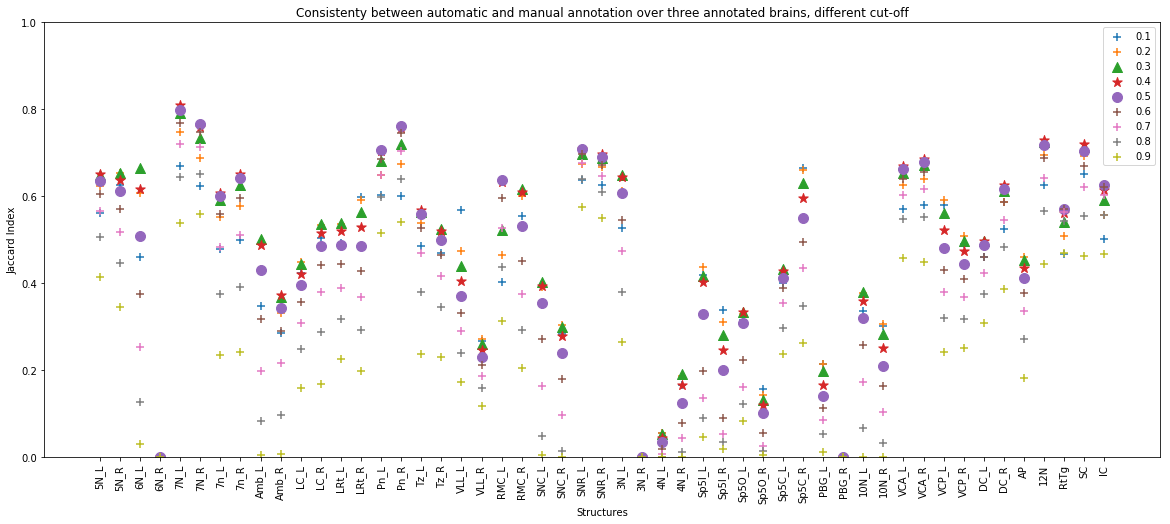

In [6]:
stack = 'MD589'
plt.figure(figsize=(20, 8));
for l in np.arange(0.1, 1, 0.1):
    vals = [jaccard_allStacks_allStructures_allLevels[stack][s][l]    
                    for i, s in enumerate(all_known_structures_sided)
                                  if len(jaccard_allStacks_allStructures_allLevels[stack][s]) > 0]
    if l == 0.5:
        plt.scatter(np.arange(len(vals)), vals, marker='o', s=100, label=l);
    elif l == 0.4:
        plt.scatter(np.arange(len(vals)), vals, marker='*', s=100, label=l);
    elif l < 0.4 and l > 0.2: # cannot directly equal to 0.3 due to precision issue
        plt.scatter(np.arange(len(vals)), vals, marker='^', s=100, label=l);
    else:
        plt.scatter(np.arange(len(vals)), vals, marker='+', s=50, label=l);

plt.xticks(range(len(all_known_structures_sided)), all_known_structures_sided, rotation='90');
plt.xlabel('Structures');
plt.ylabel('Jaccard Index');
plt.ylim([0,1]);
plt.legend();
plt.title("Consistenty between automatic and manual annotation over three annotated brains, different cut-off");

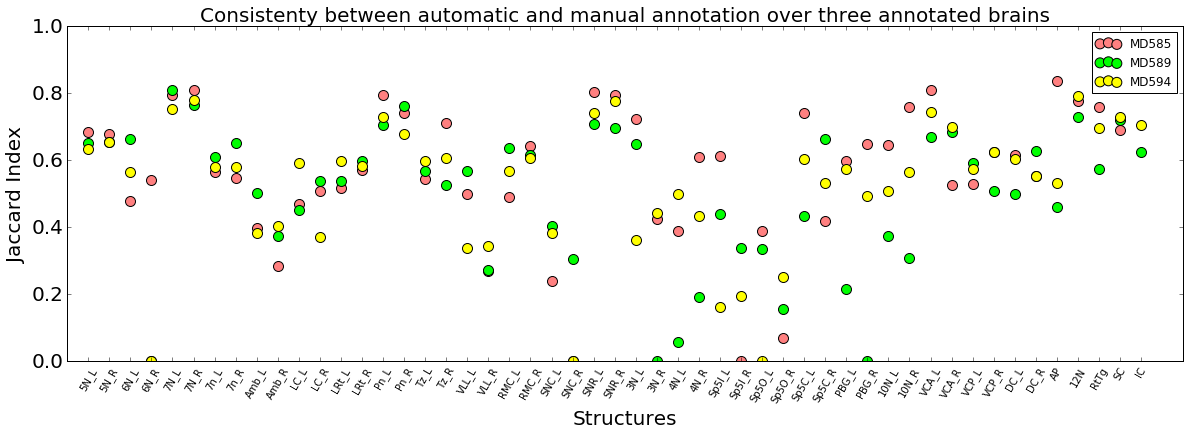

In [22]:
plt.figure(figsize=(20, 6));
for stack in all_annotated_nissl_stacks: 
    # Use the best level
    vals = [np.max(jaccard_allStacks_allStructures_allLevels[stack][s].values())
         for i, s in enumerate(all_known_structures_sided)
                                  if len(jaccard_allStacks_allStructures_allLevels[stack][s]) > 0]
    # Use a given level
#     vals = [jaccard_allStacks_allStructures_allLevels[stack][s][.5]
#      for stack in all_annotated_nissl_stacks 
#                                   if len(jaccard_allStacks_allStructures_allLevels[stack][s]) > 0]
    plt.scatter(range(len(vals)), vals, marker='o', s=100, label=stack, c=np.array(stack_to_color[stack])/255.);

plt.xticks(range(len(all_known_structures_sided)), all_known_structures_sided, rotation='60', fontsize=10);
plt.yticks(np.arange(0,1.2,0.2), np.arange(0,1.2,0.2), fontsize=20);
plt.xlabel('Structures', fontsize=20);
plt.ylabel('Jaccard Index', fontsize=20);
plt.xlim([-1,len(all_known_structures_sided)+1]);
plt.ylim([0,1]);
plt.legend();
plt.title("Consistenty between automatic and manual annotation over three annotated brains", fontsize=20);

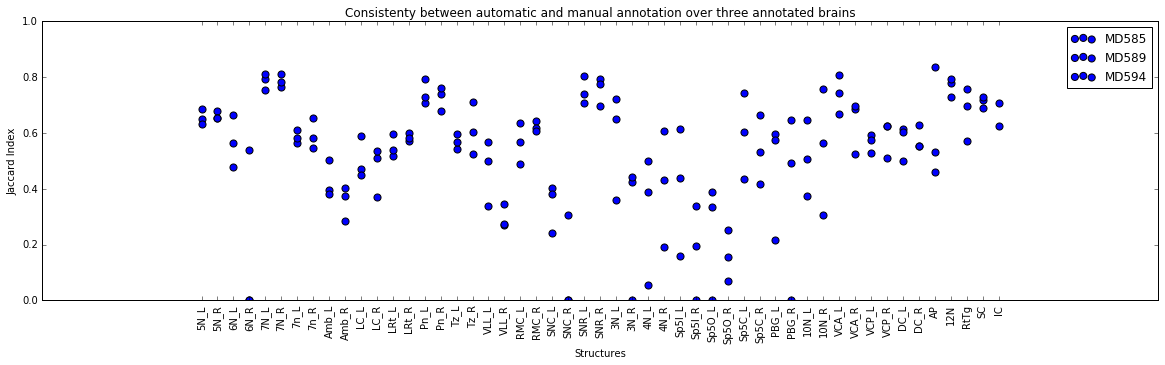

In [20]:
plt.figure(figsize=(20, 8));
for stack in all_annotated_nissl_stacks: 
    # Use the best level
    vals = [np.max(jaccard_allStacks_allStructures_allLevels[stack][s].values())
         for i, s in enumerate(all_known_structures_sided)
                                  if len(jaccard_allStacks_allStructures_allLevels[stack][s]) > 0]
    # Use a given level
#     vals = [jaccard_allStacks_allStructures_allLevels[stack][s][.5]
#      for stack in all_annotated_nissl_stacks 
#                                   if len(jaccard_allStacks_allStructures_allLevels[stack][s]) > 0]
    plt.scatter(range(len(vals)), vals, marker='o', s=50, label=stack);

plt.xticks(range(len(all_known_structures_sided)), all_known_structures_sided, rotation='90');
plt.xlabel('Structures');
plt.ylabel('Jaccard Index');
plt.ylim([0,1]);
plt.legend();
plt.title("Consistenty between automatic and manual annotation over three annotated brains");

In [8]:
# Use the best level
vals = [np.max(jaccard_allStacks_allStructures_allLevels[stack][s].values())
     for stack in all_annotated_nissl_stacks
for i, s in enumerate(all_known_structures_sided)
                              if len(jaccard_allStacks_allStructures_allLevels[stack][s]) > 0]

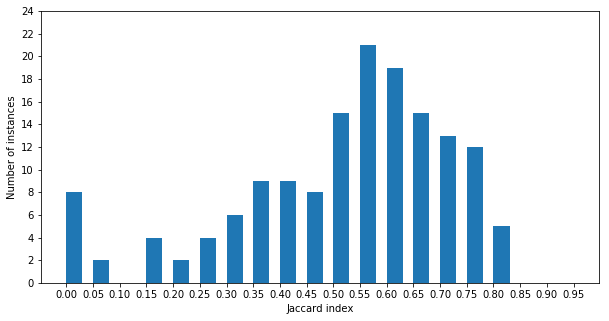

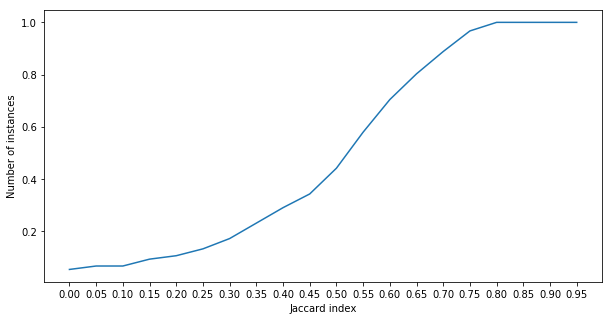

In [38]:
plt.figure(figsize=(10,5));
plt.hist(vals, bins=np.arange(0,1,0.05), width=.03);
plt.xlabel('Jaccard index');
plt.ylabel('Number of instances');
plt.yticks(np.arange(0,25,2));
plt.xticks(np.arange(0,1,0.05));
plt.show()

plt.figure(figsize=(10,5));
s = np.cumsum(np.histogram(vals, bins=np.arange(0,1.05,0.05))[0])/float(len(vals))
plt.plot(np.arange(0,1,0.05), s)
plt.xlabel('Jaccard index');
plt.ylabel('Number of instances');
plt.xticks(np.arange(0,1,0.05));
plt.show()

In [55]:
np.percentile(vals, 25), np.percentile(vals, 50), np.percentile(vals, 75)

(0.42223755068771968, 0.57139283816137787, 0.67116076449679207)